In [1]:
# Data Extraction
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplhep as hep
import ast
# Feature Analysis 
from statsmodels.tsa.stattools import acf


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.style.use([hep.style.ROOT, hep.style.firamath])
hep.rcParams.label.data = True
hep.rcParams.label.paper = False

## Read file

In [3]:
folder = '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/'

In [4]:
list_of_files = glob("/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/*.csv")

In [5]:
list_of_files

['/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_1.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_10.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_11.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_12.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_13.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_14.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_15.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_16.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias_2018A_DataFrame_1D_17.csv',
 '/eos/project/c/cmsml4dc/ML_2020/UL2018_Data/DF2018A_1D_Complete/ZeroBias

In [6]:
df = pd.read_csv(list_of_files[0])
df.head()

,fromrun,fromlumi,hname,fromrun.1,fromlumi.1,metype,hname.1,histo,entries,Xmax,Xmin,Xbins,Ymax,Ymin,Ybins
0,315267,25,goodvtxNbr,315267,25,3,goodvtxNbr,"[0, 172, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 3...",1320,79.5,-0.5,80,1,0,1
1,315267,25,adc_PXLayer_1,315267,25,3,adc_PXLayer_1,"[0, 30803, 9244, 13189, 30145, 52645, 115479, ...",14501527,255.5,-0.5,32,1,0,1
2,315267,25,adc_PXLayer_2,315267,25,3,adc_PXLayer_2,"[0, 4033, 33056, 78962, 273512, 425046, 656418...",8983394,255.5,-0.5,32,1,0,1
3,315267,25,adc_PXLayer_3,315267,25,3,adc_PXLayer_3,"[0, 794, 17299, 50925, 221719, 365101, 605099,...",7290760,255.5,-0.5,32,1,0,1
4,315267,25,adc_PXLayer_4,315267,25,3,adc_PXLayer_4,"[0, 932, 3478, 14132, 94487, 221275, 478996, 3...",5938130,255.5,-0.5,32,1,0,1


### Extracting analysed histogram from all files

In [7]:
monitoring_elements = ['chargeInner_PXLayer_1',
                       'chargeInner_PXLayer_2',
                       'chargeInner_PXLayer_3',
                       'chargeInner_PXLayer_4',
                       'size_PXLayer_1',
                       'size_PXLayer_2',
                       'size_PXLayer_3',
                       'size_PXLayer_4']                      

In [8]:
essential_columns = ['fromrun','fromlumi','hname','histo','Xmin','Xmax','Xbins','entries']

In [9]:
def extract_histo(df,histo_name):
    sub_df = df.copy()
    sub_df = sub_df[sub_df.hname == histo_name]
    sub_df = sub_df[essential_columns]
    return sub_df
    

In [10]:
df_all_files = pd.DataFrame(columns=essential_columns)
for file in list_of_files:
    df = pd.read_csv(file)
    for me in monitoring_elements : 
        df_all_files = pd.concat([df_all_files,extract_histo(df,me)])
    

In [11]:
df_all_files['histo_list'] = df_all_files['histo'].apply(lambda x : ast.literal_eval(x))

In [12]:
df_all_files.sort_values(by=["fromrun", "fromlumi"], inplace=True)
df_all_files.reset_index(inplace=True, drop=True)
df_all_files.head(10)

,fromrun,fromlumi,hname,histo,Xmin,Xmax,Xbins,entries,histo_list
0,315257,1,chargeInner_PXLayer_1,"[0, 141, 373, 471, 587, 649, 616, 711, 757, 85...",0.0,80000.0,100,170388,"[0, 141, 373, 471, 587, 649, 616, 711, 757, 85..."
1,315257,1,chargeInner_PXLayer_2,"[0, 0, 22, 82, 129, 184, 190, 229, 237, 256, 2...",0.0,80000.0,100,127234,"[0, 0, 22, 82, 129, 184, 190, 229, 237, 256, 2..."
2,315257,1,chargeInner_PXLayer_3,"[0, 0, 0, 23, 39, 67, 73, 81, 67, 74, 91, 93, ...",0.0,80000.0,100,103411,"[0, 0, 0, 23, 39, 67, 73, 81, 67, 74, 91, 93, ..."
3,315257,1,chargeInner_PXLayer_4,"[0, 0, 0, 3, 24, 31, 54, 36, 47, 64, 47, 65, 5...",0.0,80000.0,100,86966,"[0, 0, 0, 3, 24, 31, 54, 36, 47, 64, 47, 65, 5..."
4,315257,1,size_PXLayer_1,"[0, 0, 34968, 66341, 48047, 31898, 24301, 1942...",0.0,30.0,30,325121,"[0, 0, 34968, 66341, 48047, 31898, 24301, 1942..."
5,315257,1,size_PXLayer_2,"[0, 0, 15284, 52835, 52264, 35887, 25177, 1996...",0.0,30.0,30,242635,"[0, 0, 15284, 52835, 52264, 35887, 25177, 1996..."
6,315257,1,size_PXLayer_3,"[0, 0, 6066, 46240, 59151, 41974, 26769, 15177...",0.0,30.0,30,204462,"[0, 0, 6066, 46240, 59151, 41974, 26769, 15177..."
7,315257,1,size_PXLayer_4,"[0, 0, 6670, 45704, 58248, 38051, 15174, 3220,...",0.0,30.0,30,169571,"[0, 0, 6670, 45704, 58248, 38051, 15174, 3220,..."
8,315257,2,chargeInner_PXLayer_1,"[0, 139, 338, 475, 471, 603, 653, 697, 776, 86...",0.0,80000.0,100,162034,"[0, 139, 338, 475, 471, 603, 653, 697, 776, 86..."
9,315257,2,chargeInner_PXLayer_2,"[0, 0, 18, 77, 123, 157, 228, 197, 227, 254, 2...",0.0,80000.0,100,121781,"[0, 0, 18, 77, 123, 157, 228, 197, 227, 254, 2..."


In [13]:
run_list = df_all_files.fromrun.unique().tolist()
print(len(run_list))
df_all_files.fromrun.unique()


127


array([315257, 315258, 315259, 315264, 315265, 315267, 315270, 315322,
       315339, 315357, 315361, 315363, 315365, 315366, 315420, 315488,
       315489, 315490, 315506, 315509, 315510, 315512, 315543, 315555,
       315556, 315557, 315640, 315641, 315642, 315644, 315645, 315646,
       315647, 315648, 315689, 315690, 315702, 315703, 315704, 315705,
       315713, 315721, 315741, 315764, 315770, 315784, 315785, 315786,
       315790, 315800, 315801, 315840, 315973, 315974, 316058, 316059,
       316060, 316061, 316062, 316082, 316109, 316110, 316111, 316112,
       316113, 316114, 316151, 316153, 316186, 316187, 316199, 316200,
       316201, 316202, 316216, 316217, 316218, 316219, 316239, 316240,
       316241, 316271, 316361, 316362, 316363, 316377, 316378, 316379,
       316380, 316455, 316456, 316457, 316469, 316470, 316472, 316505,
       316569, 316590, 316613, 316615, 316664, 316665, 316666, 316667,
       316700, 316701, 316702, 316715, 316716, 316717, 316718, 316719,
      

### Histogram display

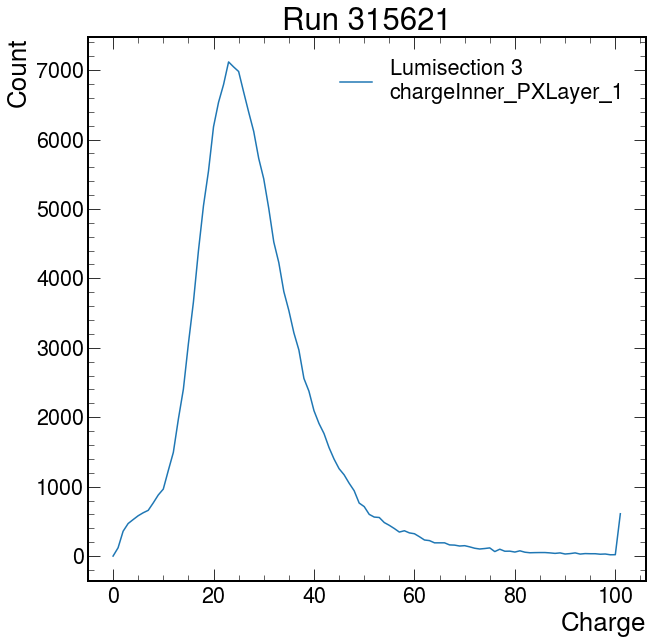

In [14]:
display_data = df_all_files[df_all_files.hname == 'chargeInner_PXLayer_1'][['histo_list','fromlumi','hname']]
#print(display_data)
plt.plot(display_data['histo_list'].get(16),label = 'Lumisection '+str(display_data['fromlumi'][16])+'\n'+display_data['hname'][16])
plt.ylabel('Count')
plt.xlabel('Charge')
plt.title('Run 315621')
plt.legend()

### Calculate mean of the histogram

In [46]:
def create_df_run(run=0):
    if run != 0 :
        df_run = df_all_files[df_all_files.fromrun == run]
    else : 
        df_run = df_all_files.copy()

    #reduced_df = df_run[['fromlumi', 'hname','histo_list']]
    #reduced_df = reduced_df.pivot(columns = 'hname',index = 'fromlumi')
    #reduced_df.head()

    #df_run['iter_val'] = (df_run['Xmax'] - df_run['Xmin'])/df_run['Xbins']
    mean_list = []
    for index,row in df_run.iterrows():
        mean_val = 0
        histo_list = row['histo_list']
        Xbins = row['Xbins']
        entries = row['entries']
        if entries == 0 :
            mean_val = 0 
        else :    
            for i in range(1,len(histo_list)-1):
                mean_val += histo_list[i]*i/(row['entries']-histo_list[0]-histo_list[1])
        mean_list.append(mean_val)
        """
        iter_var = row['iter_val']
        min_var = row['Xmin']
        max_var = row['Xmax']
        bin_elements = np.arange(min_var,max_var+iter_var,iter_var)
        for i in range(1,len(histo_list)-1):
            mean_val += histo_list[i]*bin_elements[i]/sum(histo_list)         """
        #mean_list.append(mean_val) 
        #print(histo_list[len(histo_list)-2])
        #print(bin_elements[len(histo_list)-2])
        #print(sum(histo_list[1:-1]))
        #print(min_var)
        #print(max_var)
        #print(iter_var)
        #print(bin_elements)
    #print(mean_list)
    df_run['mean'] = mean_list
    #df_run = df_run.drop(['Xmin','Xmax'],axis=1)
    return df_run

## A specific random run (Run 315721)

### histogram time series display

In [47]:
test_run = 315721 
df_test_run = create_df_run(run=test_run)
df_test_run

/tmp/ipykernel_1755/1561889452.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run['mean'] = mean_list


,fromrun,fromlumi,hname,histo,Xmin,Xmax,Xbins,entries,histo_list,mean
146576,315721,1,chargeInner_PXLayer_1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,80000.0,100,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
146577,315721,1,chargeInner_PXLayer_2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,80000.0,100,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
146578,315721,1,chargeInner_PXLayer_3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,80000.0,100,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
146579,315721,1,chargeInner_PXLayer_4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,80000.0,100,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
146580,315721,1,size_PXLayer_1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,30.0,30,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
...,...,...,...,...,...,...,...,...,...,...
151683,315721,640,chargeInner_PXLayer_4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,80000.0,100,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
151684,315721,640,size_PXLayer_1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,30.0,30,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
151685,315721,640,size_PXLayer_2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,30.0,30,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
151686,315721,640,size_PXLayer_3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,30.0,30,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0


In [56]:
mean_test_run = df_test_run.pivot_table(index=['fromlumi'],columns='hname')['mean'][32:637]
mean_test_run

hname,chargeInner_PXLayer_1,chargeInner_PXLayer_2,chargeInner_PXLayer_3,chargeInner_PXLayer_4,size_PXLayer_1,size_PXLayer_2,size_PXLayer_3,size_PXLayer_4
fromlumi,,,,,,,,
33,27.299173,26.741984,29.380924,29.914664,6.138491,5.229251,4.663225,4.200467
34,24.850982,26.987165,29.704277,30.097985,5.642908,5.169130,4.628755,4.201308
35,23.522065,26.864895,29.658130,30.090263,5.439857,5.133856,4.612323,4.205724
36,25.715518,26.709426,29.475795,29.934095,5.928122,5.174296,4.628862,4.210460
37,26.547318,26.263303,29.056835,29.720429,6.380511,5.228424,4.680617,4.247858
...,...,...,...,...,...,...,...,...
634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
635,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


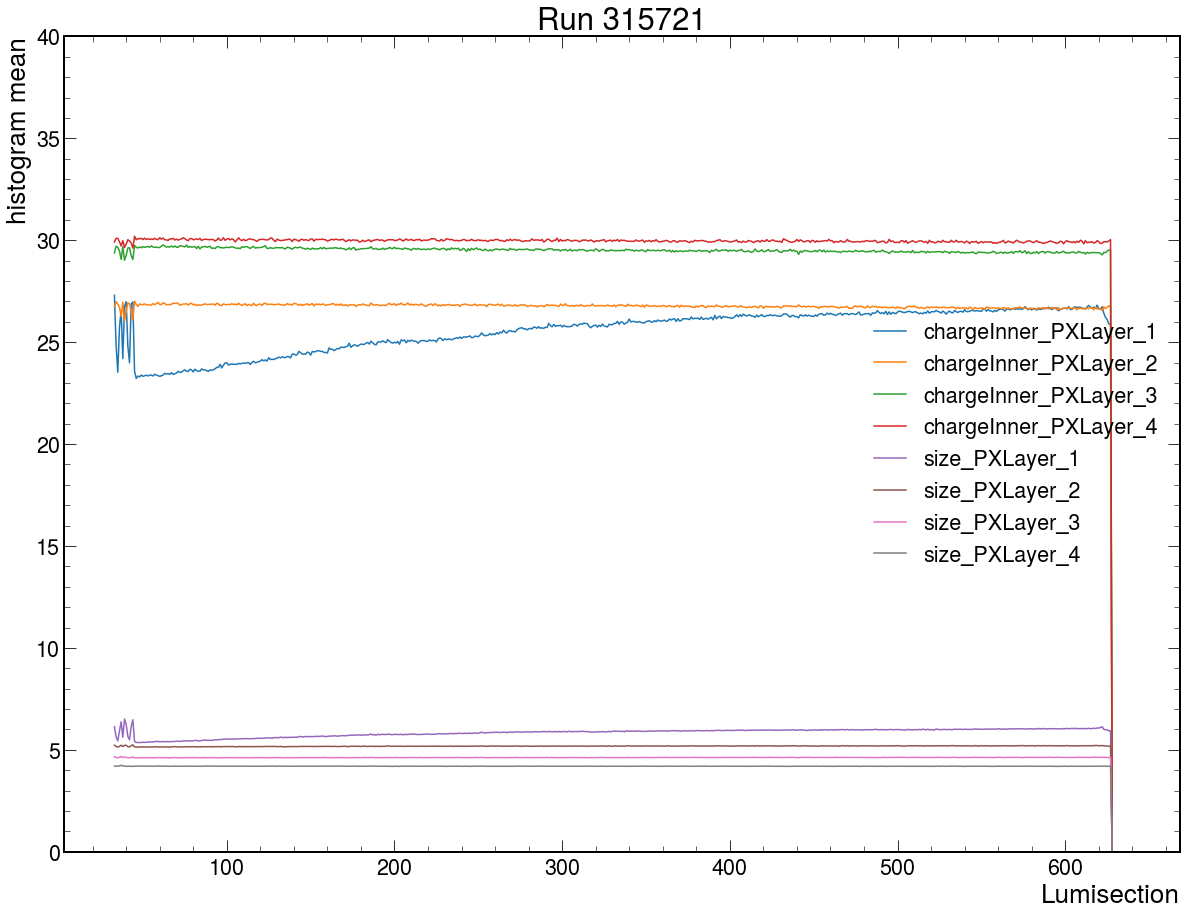

In [57]:
plt.subplots(figsize=(20,15))
plt.plot(mean_test_run,label=mean_test_run.columns)
plt.ylim(0,40)
plt.title('Run '+str(test_run))
plt.ylabel('histogram mean')
plt.xlabel('Lumisection')
plt.legend()

### Import Rate Dataset 

In [58]:
from omsapi import OMSAPI

In [59]:
omsapi = OMSAPI(api_url="https://vocms0185.cern.ch/agg/api", api_version="v1", cert_verify=False)
omsapi.auth_oidc("oms-api-client", "4577f6da-bbf7-4f5e-a898-f8db325e7e5e", audience="cmsoms-int-0185")
q = omsapi.query('datasetrates').paginate(page=1,per_page=1000).filter('run_number',315721).filter('dataset_name','ZeroBias')
response_data = q.data()
folded_json = response_data.json()

https://vocms0185.cern.ch/agg/api/v1/datasetrates/?filter[run_number][EQ]=315721&filter[dataset_name][EQ]=ZeroBias&page[offset]=0&page[limit]=1000


In [60]:
#Data Preparation
df_zerobias = pd.json_normalize(folded_json['data'])
df_zerobias = df_zerobias.rename(columns={'attributes.first_lumisection_number':'Lumisection'})
df_zerobias.set_index('Lumisection',inplace=True)
df_zerobias=df_zerobias[23:628]

In [61]:
df_zerobias.rename({'type':'hname'},axis=1,inplace=True)
df_zerobias=df_zerobias.pivot_table(index=['Lumisection'],columns='hname')['attributes.rate'][:638]
df_zerobias

hname,datasetrates
Lumisection,
33,47.618211
34,63.748344
35,63.061955
36,36.979187
37,63.834142
...,...
634,9.823937
635,8.965951
636,9.223347


In [62]:
mean_test_run=pd.concat([mean_test_run,df_zerobias],axis=1)

In [63]:
mean_test_run

hname,chargeInner_PXLayer_1,chargeInner_PXLayer_2,chargeInner_PXLayer_3,chargeInner_PXLayer_4,size_PXLayer_1,size_PXLayer_2,size_PXLayer_3,size_PXLayer_4,datasetrates
33,27.299173,26.741984,29.380924,29.914664,6.138491,5.229251,4.663225,4.200467,47.618211
34,24.850982,26.987165,29.704277,30.097985,5.642908,5.169130,4.628755,4.201308,63.748344
35,23.522065,26.864895,29.658130,30.090263,5.439857,5.133856,4.612323,4.205724,63.061955
36,25.715518,26.709426,29.475795,29.934095,5.928122,5.174296,4.628862,4.210460,36.979187
37,26.547318,26.263303,29.056835,29.720429,6.380511,5.228424,4.680617,4.247858,63.834142
...,...,...,...,...,...,...,...,...,...
634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.823937
635,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.965951
636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.223347
637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.167132


### Plan for 19/07/2022
1. [x] check the correlation between each feature to see whether the anomaly is from physic reason or detector reason. 
     - may require talking with experts
     - may require to display many run and see the correlation or pattern we have in different runs. 
2. [x] plot the histogram distribution vs lumisection. 
3. [x] extract the histogram time series into timeseries components. For example the autocorrelation or else. 



### Time Series Histogram Display

In [64]:
def colorplot(hname,run):
    histo_ts = df_all_files[(df_all_files.hname == hname) & (df_all_files.fromrun == run)]['histo_list']
    color_histo_list = pd.DataFrame([])
    i=0
    for info in histo_ts: 
        i+=1
        color_histo_list = pd.concat((color_histo_list,pd.DataFrame(info,columns=[str(i)])),axis = 1)
    c = plt.pcolormesh(color_histo_list.values)
    plt.colorbar(c)
    plt.xlabel('Lumisection')
    plt.ylabel('Charge')     
    plt.title(hname)
    return 

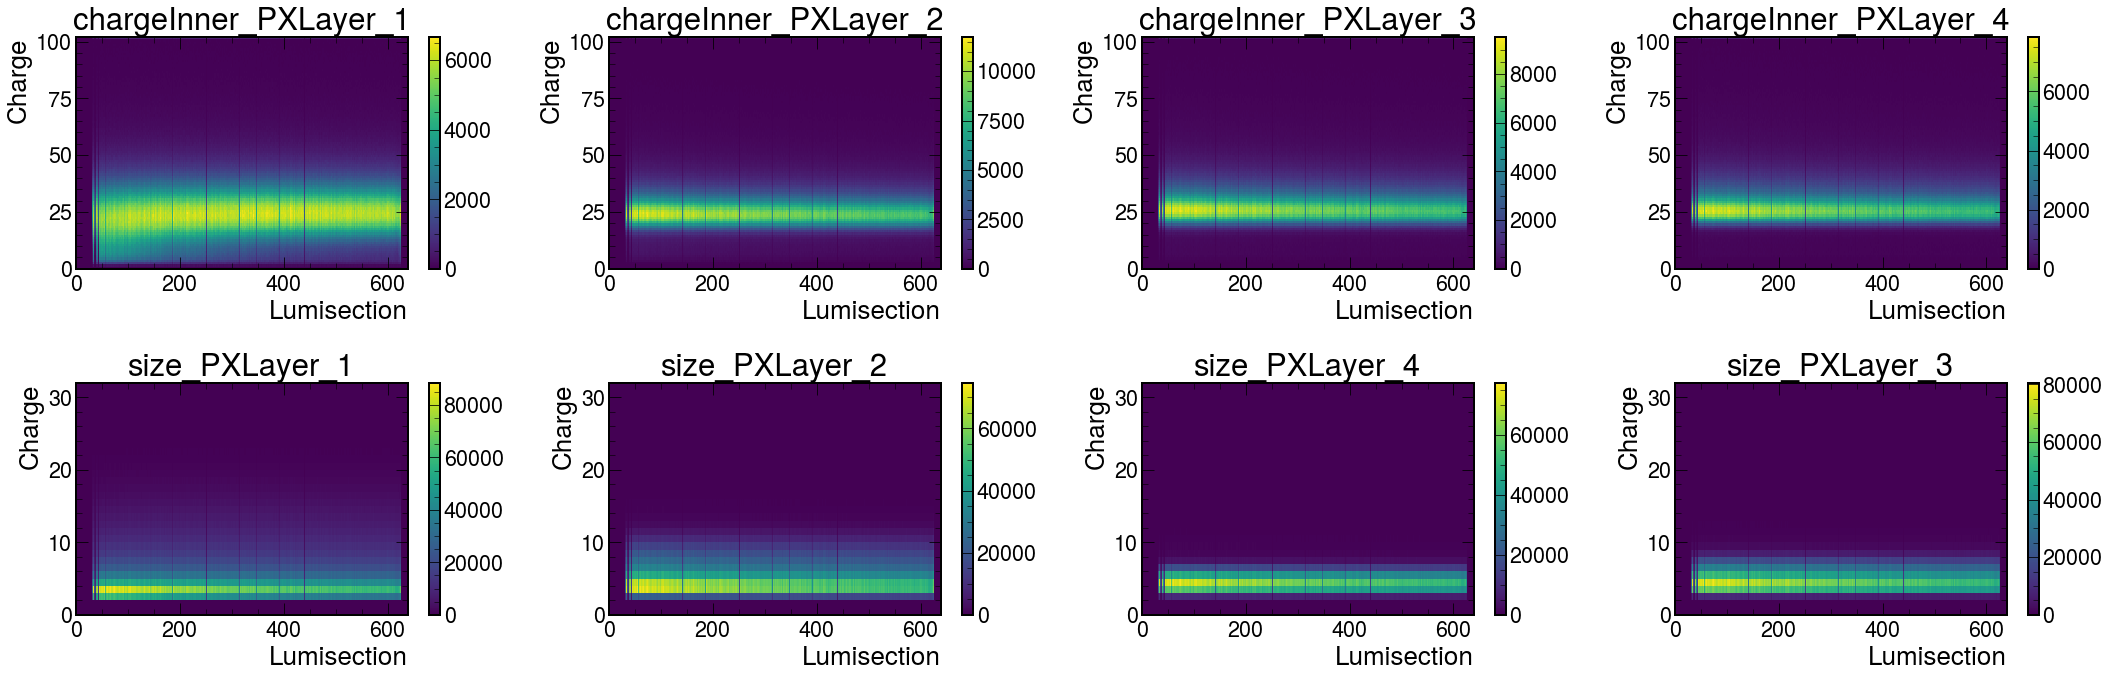

In [65]:
hname = 'chargeInner_PXLayer_1'
f,axs = plt.subplots(2,4,figsize=(30,10))
plt.subplot(241)
colorplot(hname,test_run)
plt.subplot(242)
colorplot('chargeInner_PXLayer_2',test_run)
plt.subplot(243)
colorplot('chargeInner_PXLayer_3',test_run)
plt.subplot(244)
colorplot('chargeInner_PXLayer_4',test_run)
plt.subplot(245)
colorplot('size_PXLayer_1',test_run)
plt.subplot(246)
colorplot('size_PXLayer_2',test_run)
plt.subplot(247)
colorplot('size_PXLayer_4',test_run)
plt.subplot(248)
colorplot('size_PXLayer_3',test_run)
plt.tight_layout()

### Time Series Feature Extraction 

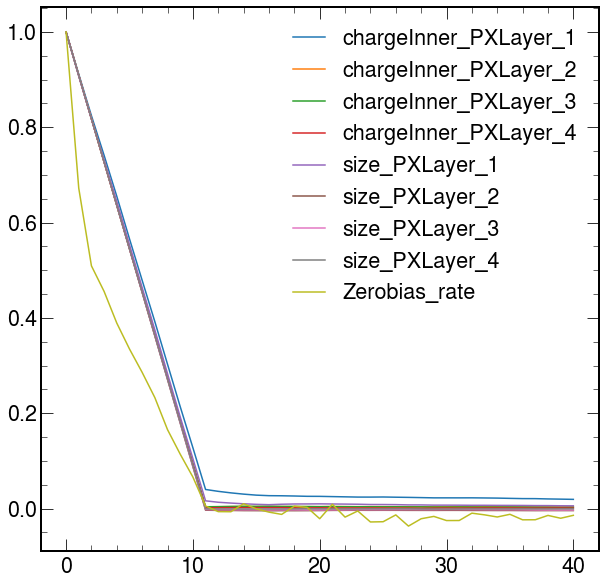

In [68]:
# finding the autocorrealtion of each eleemnet in the specific run 
# analysed dataframe is mean dataframe
for me in monitoring_elements : 
    plt.plot(acf(mean_test_run[me],fft=False),label=me)
plt.plot(acf(mean_test_run['datasetrates'],fft=False),label='Zerobias_rate')
plt.legend()


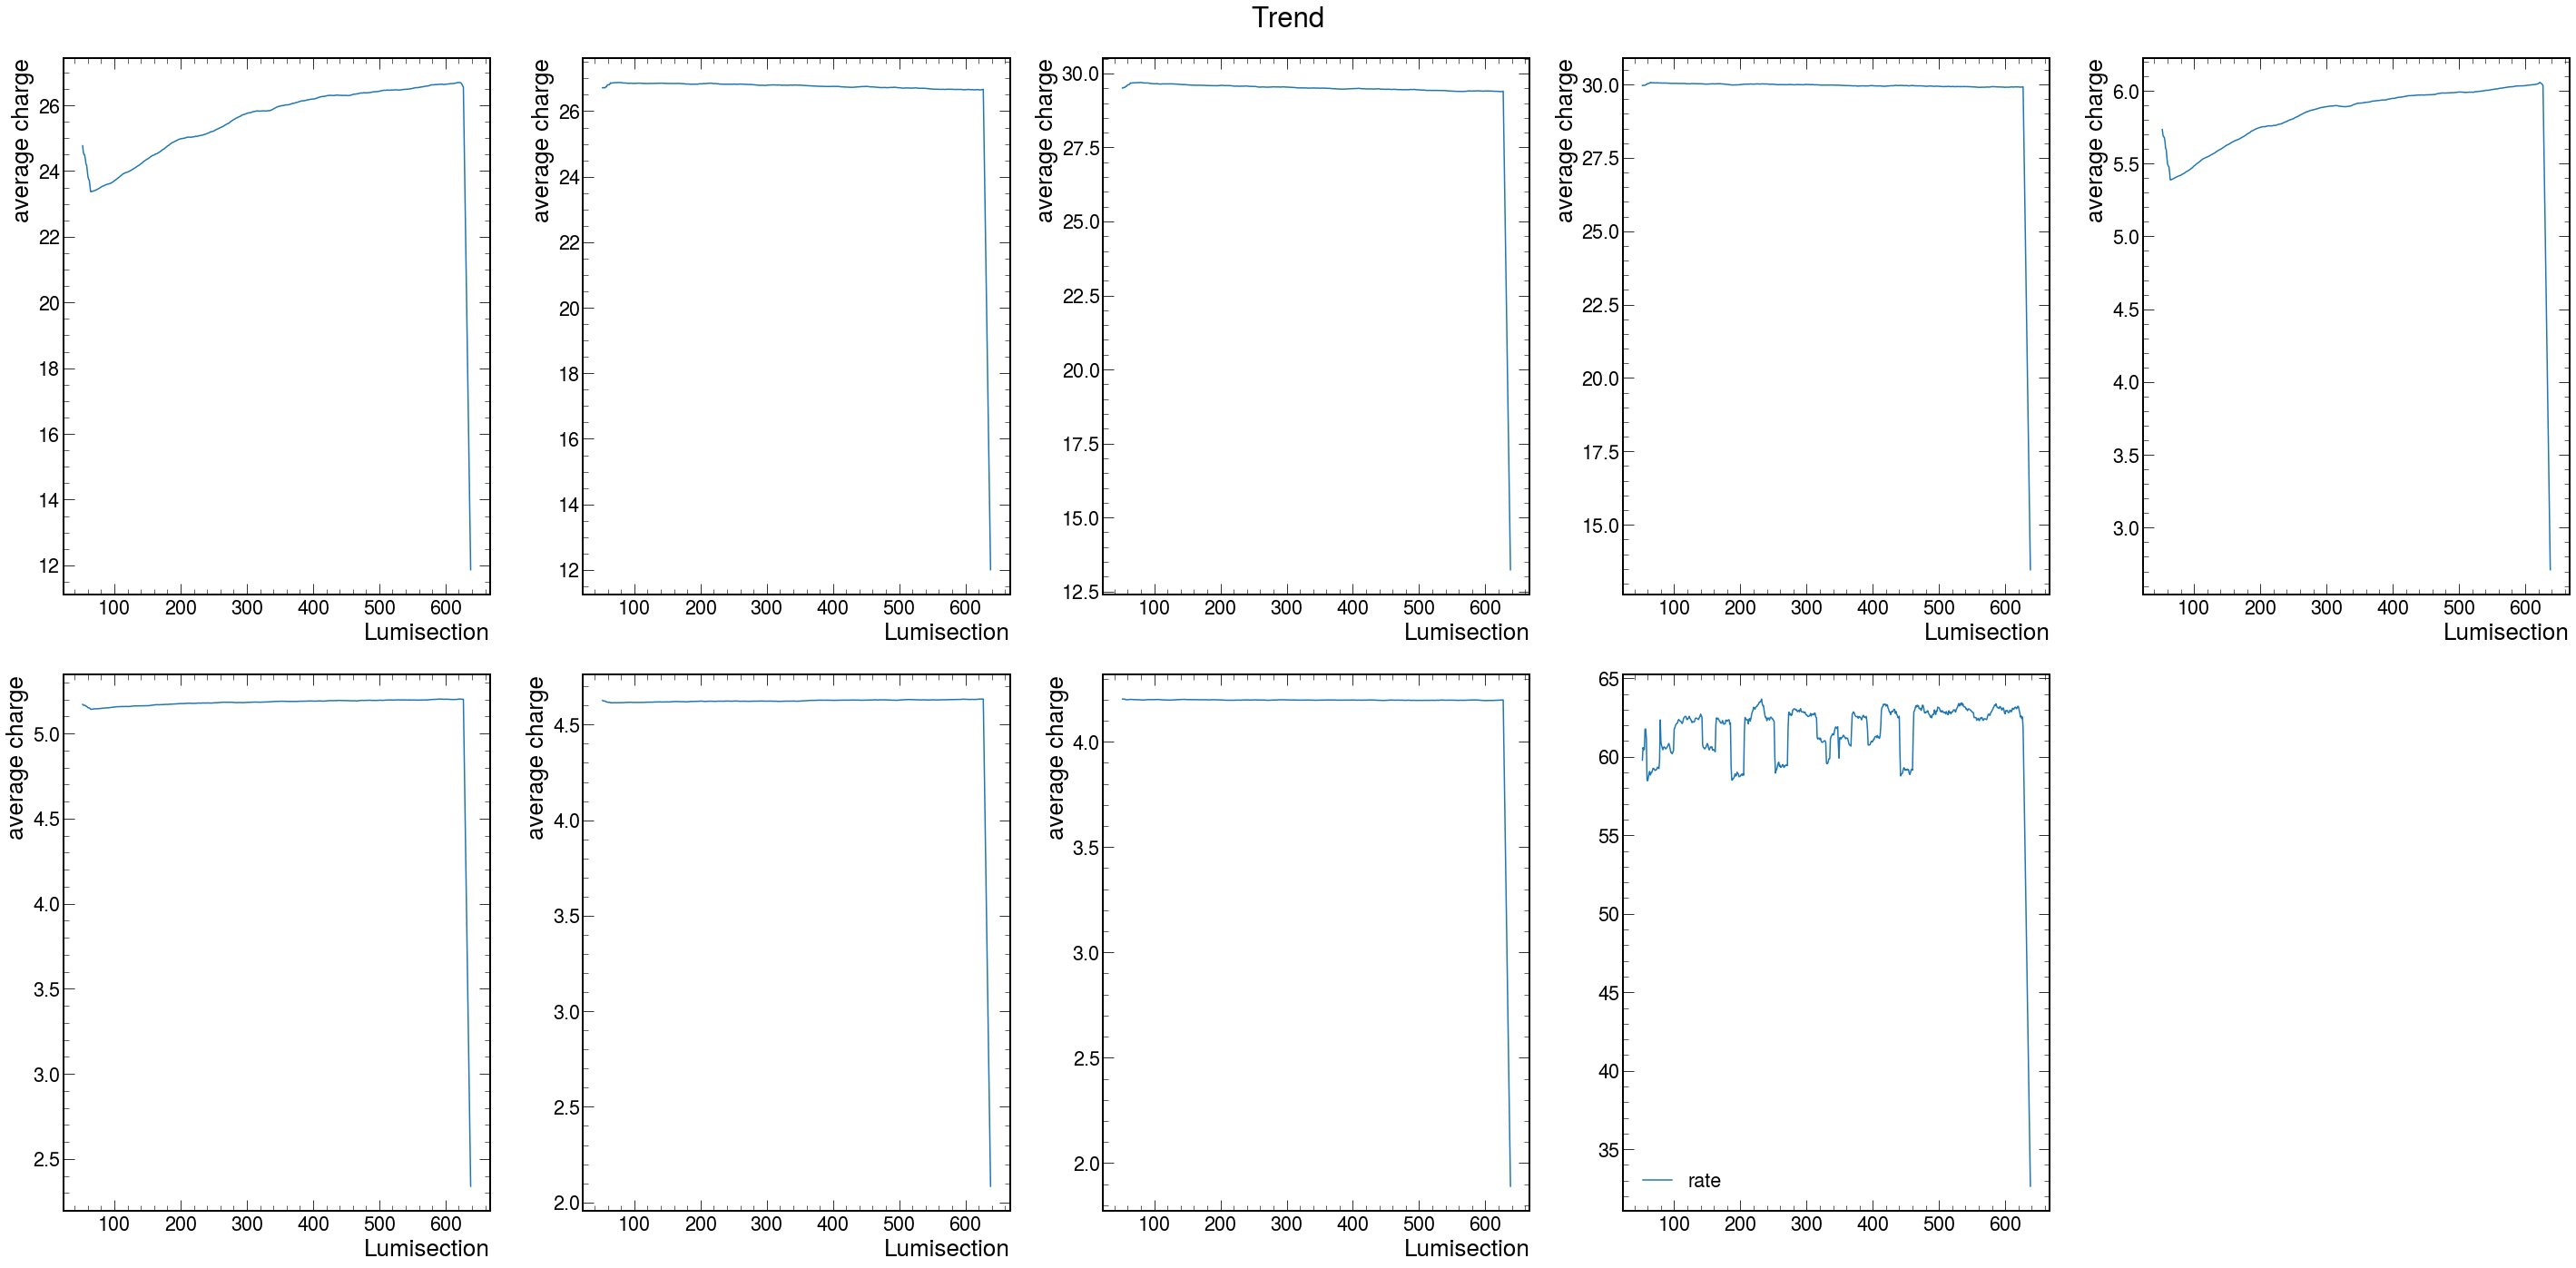

In [71]:
i=0
plt.subplots(figsize=(40,20))
for me in monitoring_elements :
    i+=1
    plt.subplot(2,5,i)
    plt.plot(mean_test_run[me].rolling(window=20).mean(),label=me)
    plt.xlabel('Lumisection')
    plt.ylabel('average charge')
plt.subplot(2,5,i+1)
plt.plot(mean_test_run['datasetrates'].rolling(window=20).mean(),label='rate')
plt.legend()
plt.suptitle('Trend')
plt.tight_layout()
    

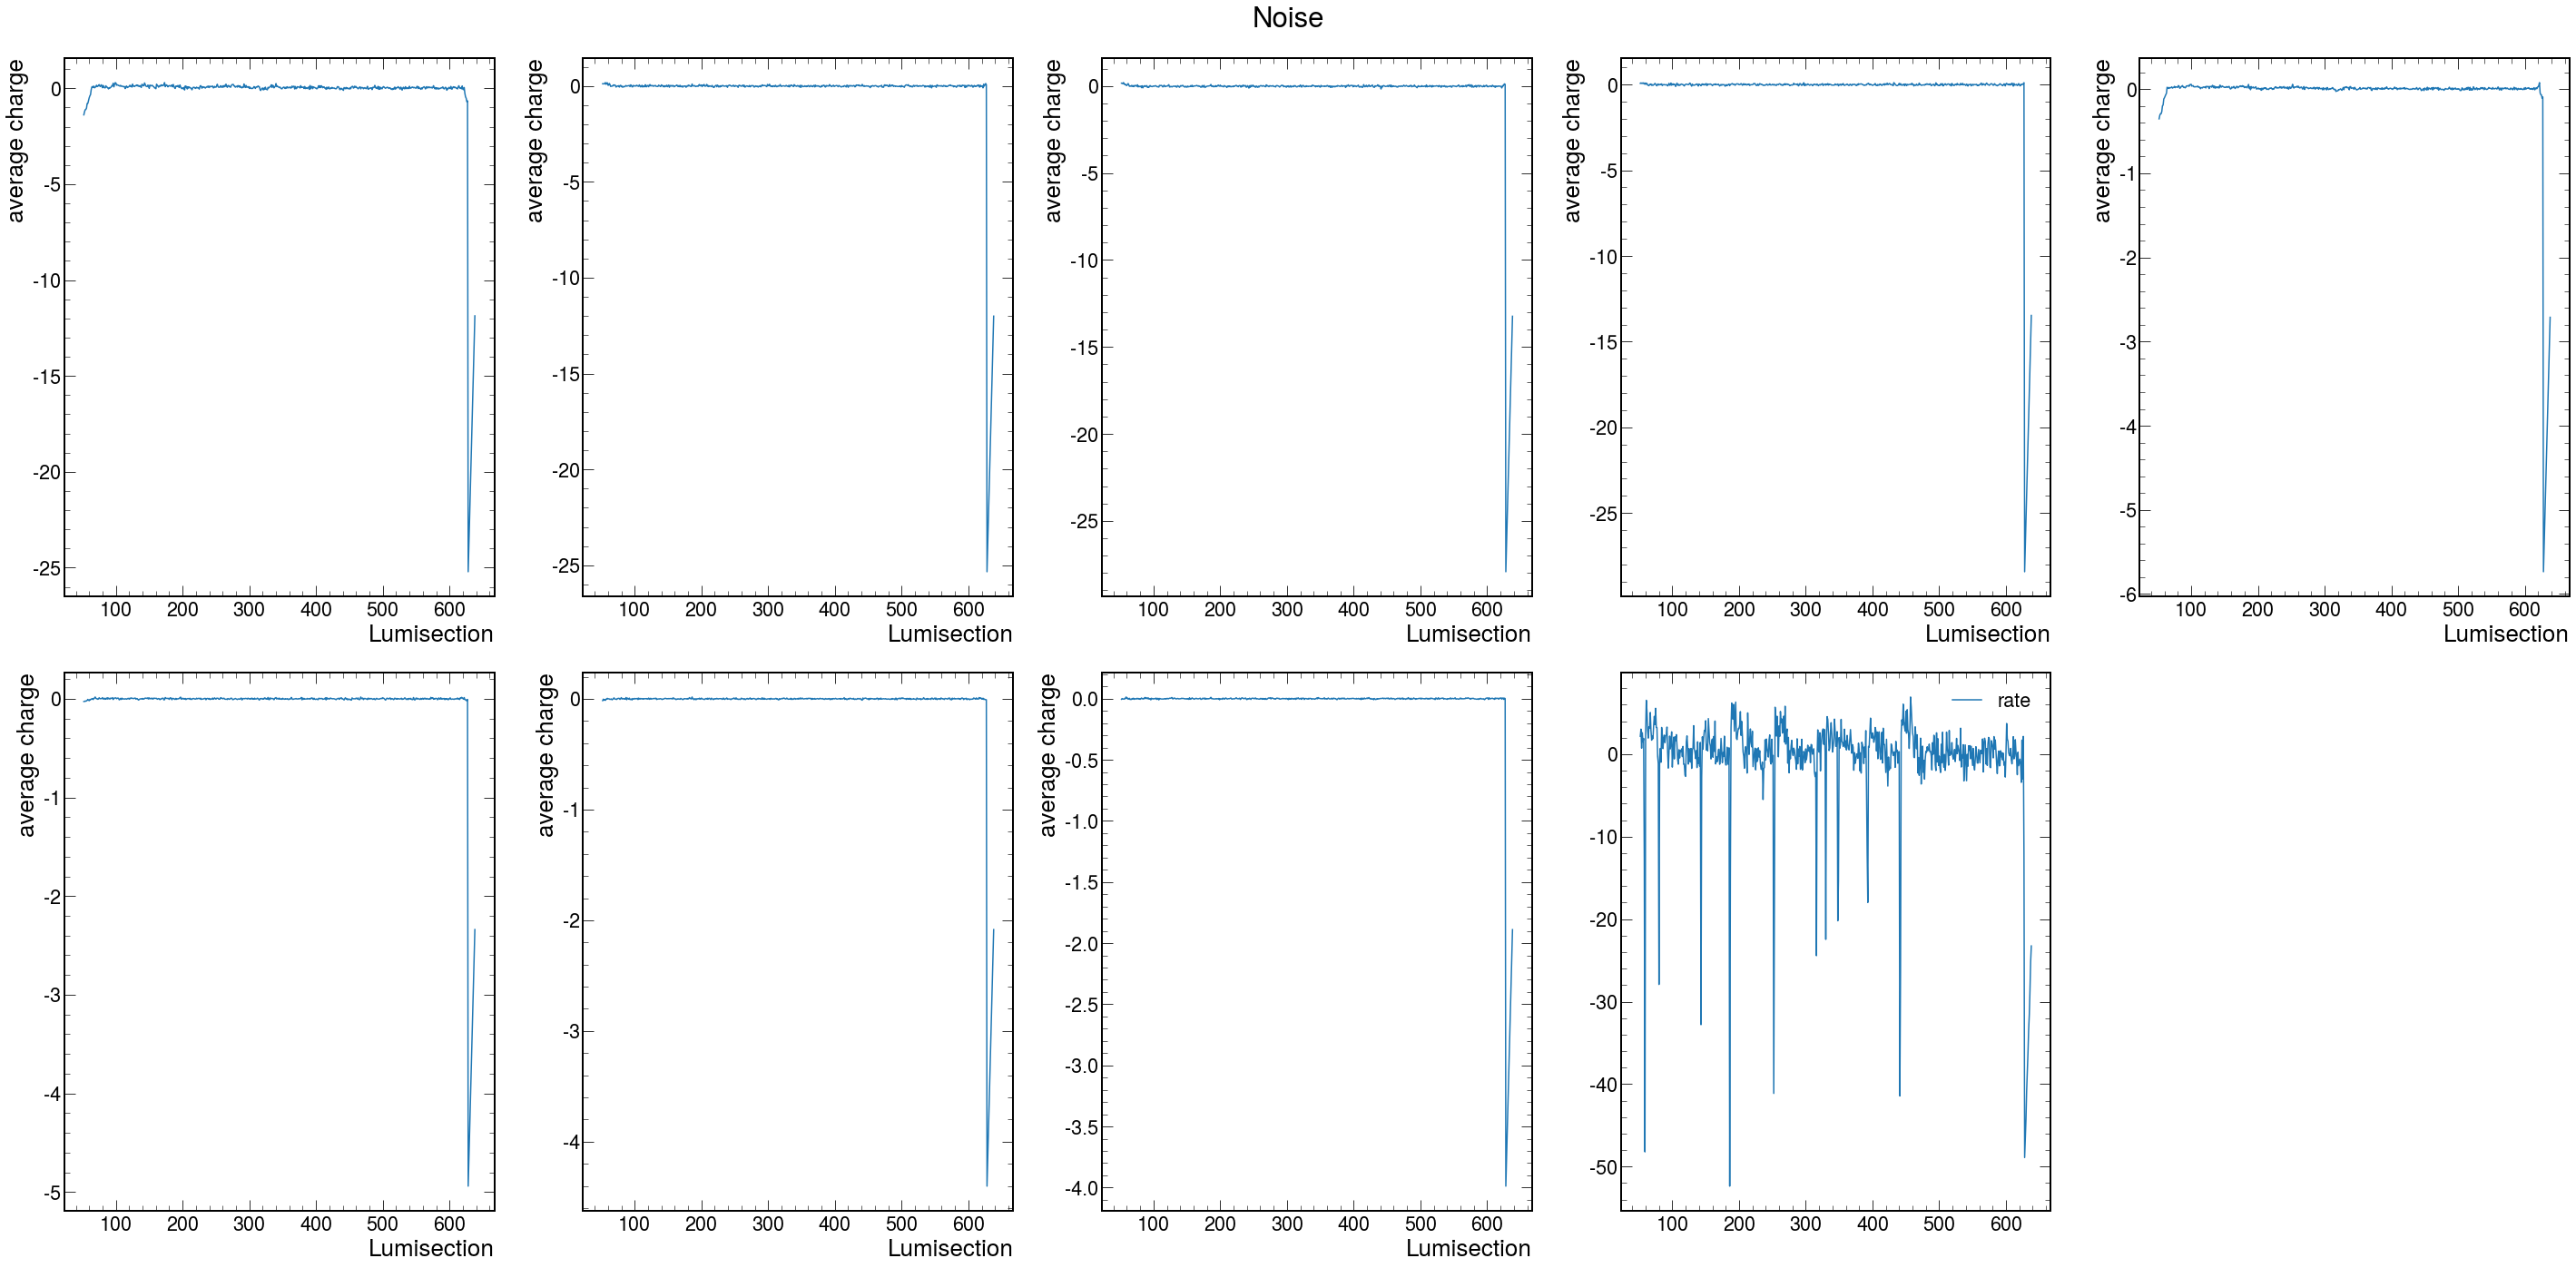

In [75]:
i=0
plt.subplots(figsize=(40,20))
for me in monitoring_elements :
    i+=1
    plt.subplot(2,5,i)
    plt.plot(mean_test_run[me] - mean_test_run[me].rolling(window=20).mean(),label=me)
    plt.xlabel('Lumisection')
    plt.ylabel('average charge')
    #plt.yscale('log')
plt.subplot(2,5,i+1)
plt.plot(mean_test_run['datasetrates']- mean_test_run['datasetrates'].rolling(window=20).mean(),label='rate')
plt.legend()
plt.suptitle('Noise')
plt.tight_layout()
    

In [24]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

TypeError: set_ticks() got an unexpected keyword argument 'labels'

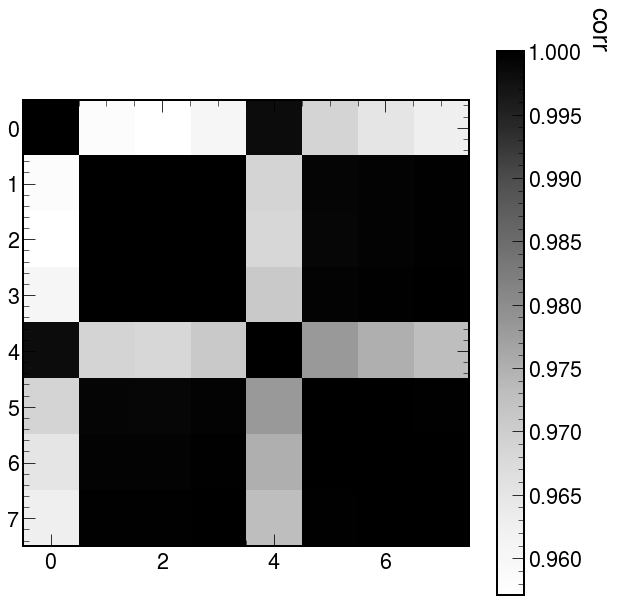

In [25]:
corrMatrix_test_run = mean_test_run.corr()
fig, ax = plt.subplots()

im, cbar = heatmap(corrMatrix_test_run, monitoring_elements, monitoring_elements, ax=ax,
                   cmap="Greys", cbarlabel="corr")
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()


### The overall run histogram display in chargeInner_PXLayer

In [26]:
df_run = create_df_run()
df_run

,fromrun,fromlumi,hname,histo,Xmin,Xmax,Xbins,entries,histo_list,mean
0,315257,1,chargeInner_PXLayer_1,"[0, 141, 373, 471, 587, 649, 616, 711, 757, 85...",0.0,80000.0,100,170388,"[0, 141, 373, 471, 587, 649, 616, 711, 757, 85...",28.228703
1,315257,1,chargeInner_PXLayer_2,"[0, 0, 22, 82, 129, 184, 190, 229, 237, 256, 2...",0.0,80000.0,100,127234,"[0, 0, 22, 82, 129, 184, 190, 229, 237, 256, 2...",27.072756
2,315257,1,chargeInner_PXLayer_3,"[0, 0, 0, 23, 39, 67, 73, 81, 67, 74, 91, 93, ...",0.0,80000.0,100,103411,"[0, 0, 0, 23, 39, 67, 73, 81, 67, 74, 91, 93, ...",29.700100
3,315257,1,chargeInner_PXLayer_4,"[0, 0, 0, 3, 24, 31, 54, 36, 47, 64, 47, 65, 5...",0.0,80000.0,100,86966,"[0, 0, 0, 3, 24, 31, 54, 36, 47, 64, 47, 65, 5...",30.220845
4,315257,1,size_PXLayer_1,"[0, 0, 34968, 66341, 48047, 31898, 24301, 1942...",0.0,30.0,30,325121,"[0, 0, 34968, 66341, 48047, 31898, 24301, 1942...",6.499199
...,...,...,...,...,...,...,...,...,...,...
489219,316995,638,chargeInner_PXLayer_4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,80000.0,100,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
489220,316995,638,size_PXLayer_1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,30.0,30,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
489221,316995,638,size_PXLayer_2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,30.0,30,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
489222,316995,638,size_PXLayer_3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,30.0,30,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000


In [27]:
mean = df_run.pivot_table(index=['fromrun','fromlumi'],columns='hname')['mean']
mean

hname             chargeInner_PXLayer_1  chargeInner_PXLayer_2  \
fromrun fromlumi                                                 
315257  1                     28.228703              27.072756   
        2                     28.091170              27.090515   
        3                     28.101980              27.032802   
        4                     28.173658              27.080559   
        5                     28.193177              27.003435   
...                                 ...                    ...   
316995  634                    0.000000               0.000000   
        635                    0.000000               0.000000   
        636                    0.000000               0.000000   
        637                    0.000000               0.000000   
        638                    0.000000               0.000000   

hname             chargeInner_PXLayer_3  chargeInner_PXLayer_4  \
fromrun fromlumi                                                 
315257  1                     29.700100              30.220845   
        2                     29.753293              30.311680   
        3                     29.669463              30.221654   
        4                     29.738373              30.233255   
        5                     29.672202              30.283259   
...                                 ...                    ...   
316995  634                    0.000000               0.000000   
        635                    0.000000               0.000000   
        636                    0.000000               0.000000   
        637                    0.000000               0.000000   
        638                    0.000000               0.000000   

hname             size_PXLayer_1  size_PXLayer_2  size_PXLayer_3  \
fromrun fromlumi                                                   
315257  1               6.499199        5.177683        4.629237   
        2               6.503749        5.179035        4.626842   
        3               6.492826        5.158502        4.630422   
        4               6.505969        5.176763        4.629869   
        5               6.511939        5.170738        4.637206   
...                          ...             ...             ...   
316995  634             0.000000        0.000000        0.000000   
        635             0.000000        0.000000        0.000000   
        636             0.000000        0.000000        0.000000   
        637             0.000000        0.000000        0.000000   
        638             0.000000        0.000000        0.000000   

hname             size_PXLayer_4  
fromrun fromlumi                  
315257  1               4.198259  
        2               4.198932  
        3               4.199699  
        4               4.197872  
        5               4.204561  
...                          ...  
316995  634             0.000000  
        635             0.000000  
        636             0.000000  
        637             0.000000  
        638             0.000000  

[61153 rows x 8 columns]

In [28]:
plt.subplots(5,10,figsize=(200,100))
for i in range(50):
    plt.subplot(5,10,i+1)
    for me in monitoring_elements[:4]:
        plt.plot(mean[me].loc[run_list[i]],label=mean.columns)
    plt.ylim(0,40)
    plt.title('Run '+str(run_list[i]))
plt.ylabel('histogram mean')
plt.xlabel('Lumisection')

#plt.legend()


Text(1, 0, 'Lumisection')

In [ ]:
# Try to compare path and chargeInner_PXLayer